# Analysis Pipeline
   > ## 1. Set up environment
   > ## 2. Read excel file
   > ## 3 Exploratory Data Analysis
   > ## 4 Modeling on the cleaned data by H2O GBM
   

# 1. Set up environment

In [1]:
!pip install dill
!pip install sweetviz
!pip install openpyxl
import pickle
import dill
import sweetviz as sv
import pandas as pd
import numpy as np
def pickleload(file):
    with open(file, 'rb') as file:
          
        # Call load method to deserialze
        myvar = pickle.load(file)
        return(myvar)
    
def picklesave(myvar,files):
    with open(files, 'wb') as file:
          
        # Call load method to deserialze
        myvar = pickle.dump(myvar,file)
        #return(myvar)   

# 2. Read excel file

In [197]:
xdata = pd.read_excel("./data/CaseSTudy_2_data.xlsx")



In [198]:
xdata.head()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead _Form_submission
0,1.767882e+09,210.00,210.0,Paid Search,desktop,Yes,2.0,8,1,1,1,1,0,840,4,0,Returning Visitor,0
1,1.604589e+09,0.00,0.0,Paid Search,desktop,No,1.0,10,0,0,0,0,0,0,10,0,Returning Visitor,0
2,1.515450e+09,108.33,54.0,Paid Search,desktop,Yes,3.0,9,1,1,1,1,1,325,3,0,Returning Visitor,0
3,4.077739e+08,15.00,0.0,Paid Search,desktop,No,1.0,2,0,0,0,0,0,30,2,0,Returning Visitor,0
4,1.070705e+09,0.00,0.0,Paid Search,mobile,No,1.0,1,0,0,0,0,0,0,1,0,New Visitor,0


In [199]:
xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visitor_Identifier     49420 non-null  float64
 1   Avg_Session_Duration   49420 non-null  float64
 2   avg_time_on_page       49420 non-null  float64
 3   Channel_Grouping       49420 non-null  object 
 4   device_category        49420 non-null  object 
 5   non_shopper            49420 non-null  object 
 6   Pages_Session          49420 non-null  float64
 7   pageviews              49420 non-null  int64  
 8   Session_1plus_minute   49420 non-null  int64  
 9   Session_3plus_minutes  49420 non-null  int64  
 10  Session_3plus_pages    49420 non-null  int64  
 11  Session_5plus_minutes  49420 non-null  int64  
 12  Session_5plus_pages    49420 non-null  int64  
 13  session_duration       49420 non-null  int64  
 14  sessions               49420 non-null  int64  
 15  Un

In [200]:
# simple clean up the read-in variables
xdata['Visitor_Identifier'] = xdata.Visitor_Identifier.astype(str)
xdata['target'] = xdata['Lead _Form_submission']
#xdata = xdata.drop('Lead _Form_submission',axis=1)
xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visitor_Identifier     49420 non-null  object 
 1   Avg_Session_Duration   49420 non-null  float64
 2   avg_time_on_page       49420 non-null  float64
 3   Channel_Grouping       49420 non-null  object 
 4   device_category        49420 non-null  object 
 5   non_shopper            49420 non-null  object 
 6   Pages_Session          49420 non-null  float64
 7   pageviews              49420 non-null  int64  
 8   Session_1plus_minute   49420 non-null  int64  
 9   Session_3plus_minutes  49420 non-null  int64  
 10  Session_3plus_pages    49420 non-null  int64  
 11  Session_5plus_minutes  49420 non-null  int64  
 12  Session_5plus_pages    49420 non-null  int64  
 13  session_duration       49420 non-null  int64  
 14  sessions               49420 non-null  int64  
 15  Un

In [203]:
xdata.select_dtypes(include='number').columns

Index(['Avg_Session_Duration', 'avg_time_on_page', 'Pages_Session',
       'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
       'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
       'session_duration', 'sessions', 'Unique_Views2_BU',
       'Lead _Form_submission', 'target'],
      dtype='object')

In [204]:
num_prd_list = xdata.select_dtypes(include='number').columns[:-2] # exclude target and keep only numerical predictors
cat_prd_list = list(set(xdata.columns) - set(xdata.select_dtypes(include='number'))) #categorical features
cleandata = pd.concat([xdata[num_prd_list].astype('float32'),xdata[cat_prd_list],xdata.target],axis=1)


In [206]:
num_prd_list, cat_prd_list

(Index(['Avg_Session_Duration', 'avg_time_on_page', 'Pages_Session',
        'pageviews', 'Session_1plus_minute', 'Session_3plus_minutes',
        'Session_3plus_pages', 'Session_5plus_minutes', 'Session_5plus_pages',
        'session_duration', 'sessions', 'Unique_Views2_BU'],
       dtype='object'),
 ['user_type',
  'Channel_Grouping',
  'device_category',
  'non_shopper',
  'Visitor_Identifier'])

In [207]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_Session_Duration   49420 non-null  float32
 1   avg_time_on_page       49420 non-null  float32
 2   Pages_Session          49420 non-null  float32
 3   pageviews              49420 non-null  float32
 4   Session_1plus_minute   49420 non-null  float32
 5   Session_3plus_minutes  49420 non-null  float32
 6   Session_3plus_pages    49420 non-null  float32
 7   Session_5plus_minutes  49420 non-null  float32
 8   Session_5plus_pages    49420 non-null  float32
 9   session_duration       49420 non-null  float32
 10  sessions               49420 non-null  float32
 11  Unique_Views2_BU       49420 non-null  float32
 12  user_type              49420 non-null  object 
 13  Channel_Grouping       49420 non-null  object 
 14  device_category        49420 non-null  object 
 15  no

# 3 Exploratory Data Analysis

In [210]:
# comprehensive EDA
sweet_report = sv.analyze(cleandata,target_feat = 'target') # univariate analysis
sweet_report.show_html('/Users/qili/Downloads/adp/docu/sweet_report_adpdata.html')

                                             |                                                                …

Report /Users/qili/Downloads/adp/docu/sweet_report_adpdata.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [211]:
cleandata.Channel_Grouping.unique() #confirm this is the constant column, can be dropped from future analysis

array(['Paid Search'], dtype=object)

In [212]:
cleandata = cleandata.drop(['Channel_Grouping','Visitor_Identifier'],axis=1) #drop these columns before modeling

In [52]:
cleandata.info() #final check of dataframe before moving for modeling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_Session_Duration   49420 non-null  float32
 1   avg_time_on_page       49420 non-null  float32
 2   Pages_Session          49420 non-null  float32
 3   pageviews              49420 non-null  float32
 4   Session_1plus_minute   49420 non-null  float32
 5   Session_3plus_minutes  49420 non-null  float32
 6   Session_3plus_pages    49420 non-null  float32
 7   Session_5plus_minutes  49420 non-null  float32
 8   Session_5plus_pages    49420 non-null  float32
 9   session_duration       49420 non-null  float32
 10  sessions               49420 non-null  float32
 11  Unique_Views2_BU       49420 non-null  float32
 12  non_shopper            49420 non-null  object 
 13  device_category        49420 non-null  object 
 14  user_type              49420 non-null  object 
 15  ta

In [37]:

np.unique(cleandata.target,return_counts=True)

(array([0, 1]), array([47615,  1805]))

In [215]:
cleandata.groupby('Unique_Views2_BU').target.mean()
cleandata.groupby('Unique_Views2_BU').Unique_Views2_BU.count()/cleandata.shape[0]
cleandata['Unique_Views2_BU'] = cleandata['Unique_Views2_BU'].astype('category')
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49420 entries, 0 to 49419
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Avg_Session_Duration   49420 non-null  float32 
 1   avg_time_on_page       49420 non-null  float32 
 2   Pages_Session          49420 non-null  float32 
 3   pageviews              49420 non-null  float32 
 4   Session_1plus_minute   49420 non-null  float32 
 5   Session_3plus_minutes  49420 non-null  float32 
 6   Session_3plus_pages    49420 non-null  float32 
 7   Session_5plus_minutes  49420 non-null  float32 
 8   Session_5plus_pages    49420 non-null  float32 
 9   session_duration       49420 non-null  float32 
 10  sessions               49420 non-null  float32 
 11  Unique_Views2_BU       49420 non-null  category
 12  user_type              49420 non-null  object  
 13  device_category        49420 non-null  object  
 14  non_shopper            49420 non-null 

# 4 Modeling on the cleaned data by H2O GBM
### 4.1 Baseline model - H2O

In [216]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

train_data, test_data = train_test_split(cleandata, test_size=0.2, random_state=42) #80% to 20% train, test dataset split

# convert Pandas DataFrame to H2O frame
train_h2o = h2o.H2OFrame(train_data)
test_h2o = h2o.H2OFrame(test_data)

# Identify predictors and response
predictors = [col for col in cleandata.columns if col not in ['target']]
response = 'target'

categorical_cols = ['Unique_Views2_BU','non_shopper', 'device_category', 'user_type','target']
for col in categorical_cols:
    train_h2o[col] = train_h2o[col].asfactor() # categorical columns
    test_h2o[col] = test_h2o[col].asfactor()

# initialize and train the GBM model
gbm_model = H2OGradientBoostingEstimator(seed=40, ntrees=40,max_depth=3,min_rows=10)
gbm_model.train(x=predictors, y=response,training_frame=train_h2o,validation_frame= test_h2o,model_id='baseline')

# make predictions on the test set
predictions = gbm_model.predict(test_h2o)

# calculate AUC
actuals = test_h2o[response].as_data_frame() #convert from h2o dataframe to pandas dataframe
predicted_probs = predictions['p1'].as_data_frame()
auc = roc_auc_score(actuals, predicted_probs) #metric auc on testing 

# Display the AUC
print(f'AUC on the test set: {auc}')








Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
AUC on the test set: 0.9854006691531373


/Users/qili/Desktop/yahoo_finance_macbook/tensorflow-test/env/lib/python3.8/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/qili/Desktop/yahoo_finance_macbook/tensorflow-test/env/lib/python3.8/site-packages/h2o/frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


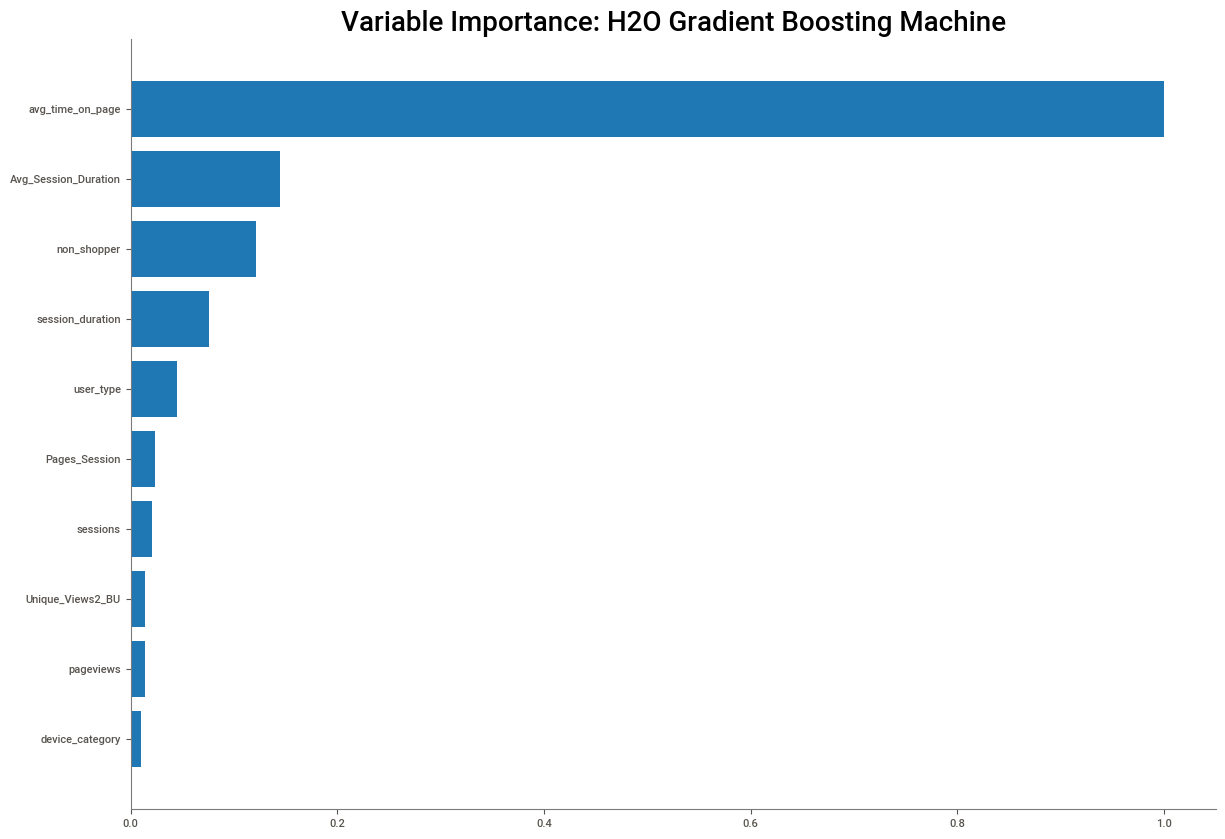

[('avg_time_on_page', 2117.248046875, 1.0, 0.6793488354157449), ('Avg_Session_Duration', 305.749755859375, 0.14440903904039645, 0.09810411249560015), ('non_shopper', 257.4568176269531, 0.12159974265034856, 0.08260864355636857), ('session_duration', 160.48887634277344, 0.075800696370768, 0.051495114803183716), ('user_type', 95.48091125488281, 0.0450967053179291, 0.03063639423882216), ('Pages_Session', 49.164306640625, 0.02322085346267773, 0.01577505975722978), ('sessions', 43.35730743408203, 0.020478142605008527, 0.013911802330190091), ('Unique_Views2_BU', 30.135032653808594, 0.014233113922710698, 0.009669249367733135), ('pageviews', 29.249099731445312, 0.013814677866684624, 0.009384985320375865), ('device_category', 20.7808895111084, 0.009815047198546444, 0.006667840883883096), ('Session_3plus_pages', 4.868778228759766, 0.0022995785665954204, 0.0015622160211636066), ('Session_1plus_minute', 2.604672431945801, 0.001230216004114504, 0.0008357458097049995), ('Session_3plus_minutes', 0.0, 

<Figure size 640x480 with 0 Axes>

In [218]:
#variable importance
gbm_model.varimp_plot()
print(gbm_model.varimp())

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


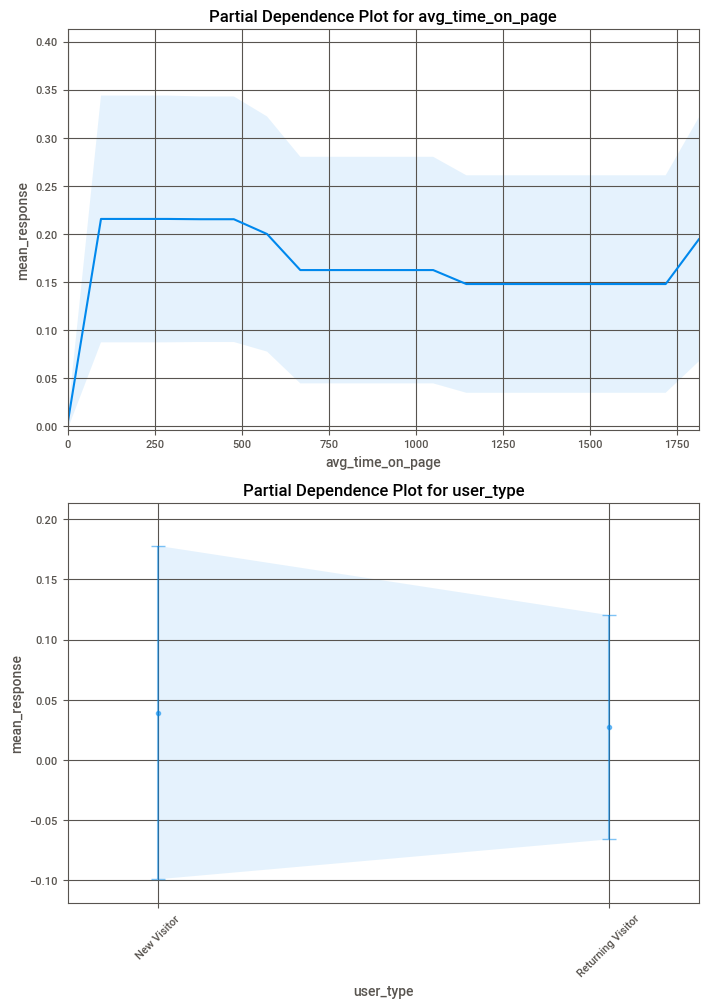

In [219]:
#partial dependece plot for model explainability
pdp_data = gbm_model.partial_plot(test_h2o, cols=["avg_time_on_page",'user_type'], plot=True)
#pdp_data[0].plot()
#plt.show()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## baseline

,0,1,Error,Rate
0,9365.0,175.0,0.0183,(175.0/9540.0)
1,64.0,280.0,0.186,(64.0/344.0)
Total,9429.0,455.0,0.0242,(239.0/9884.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

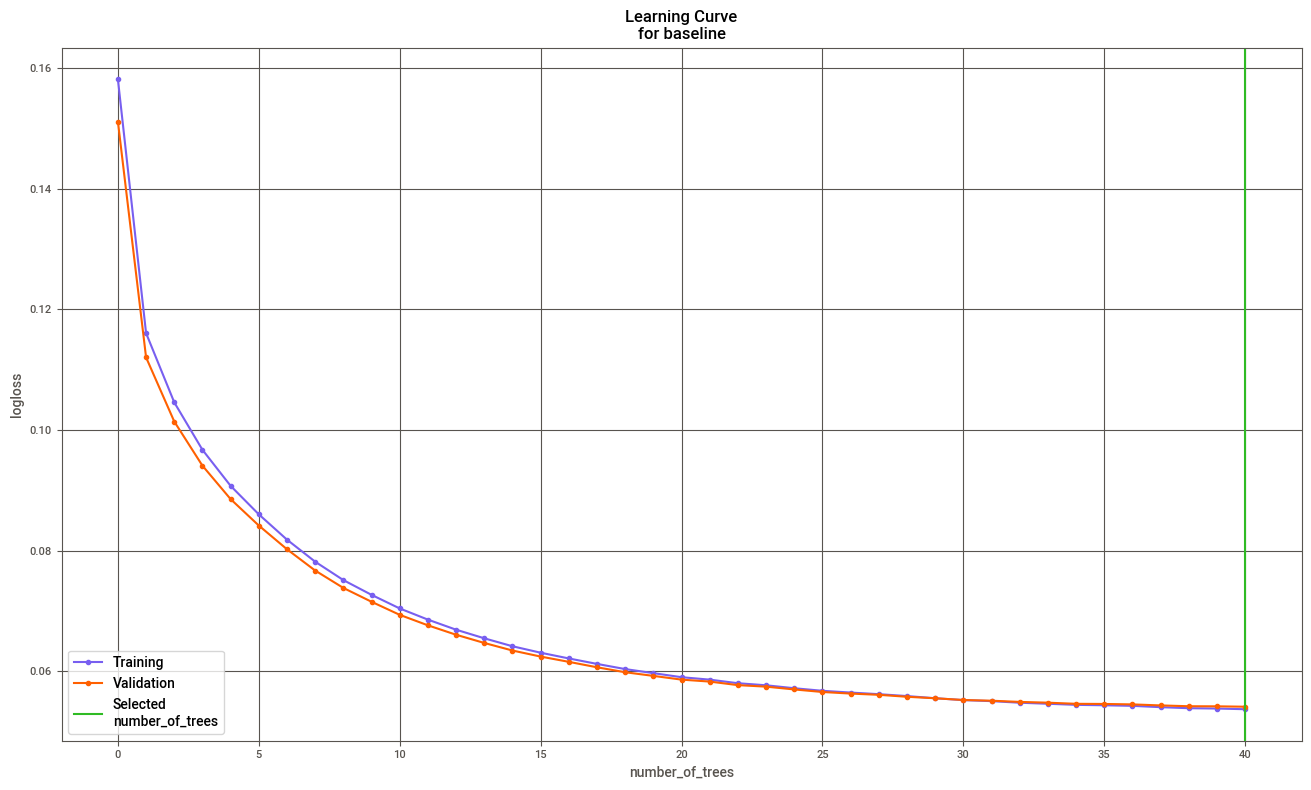

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

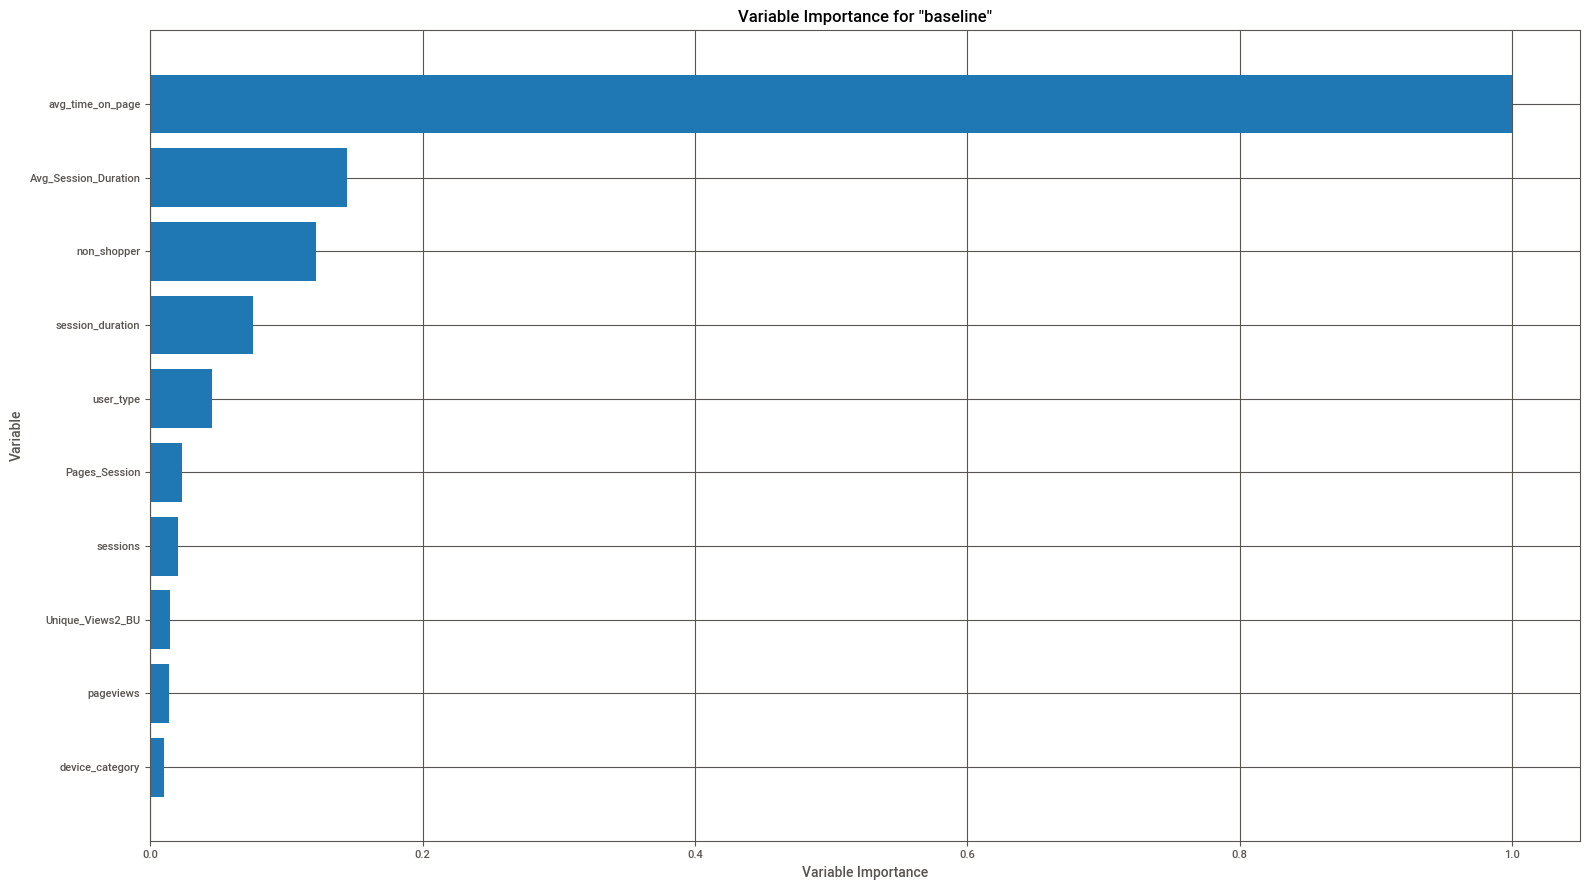

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

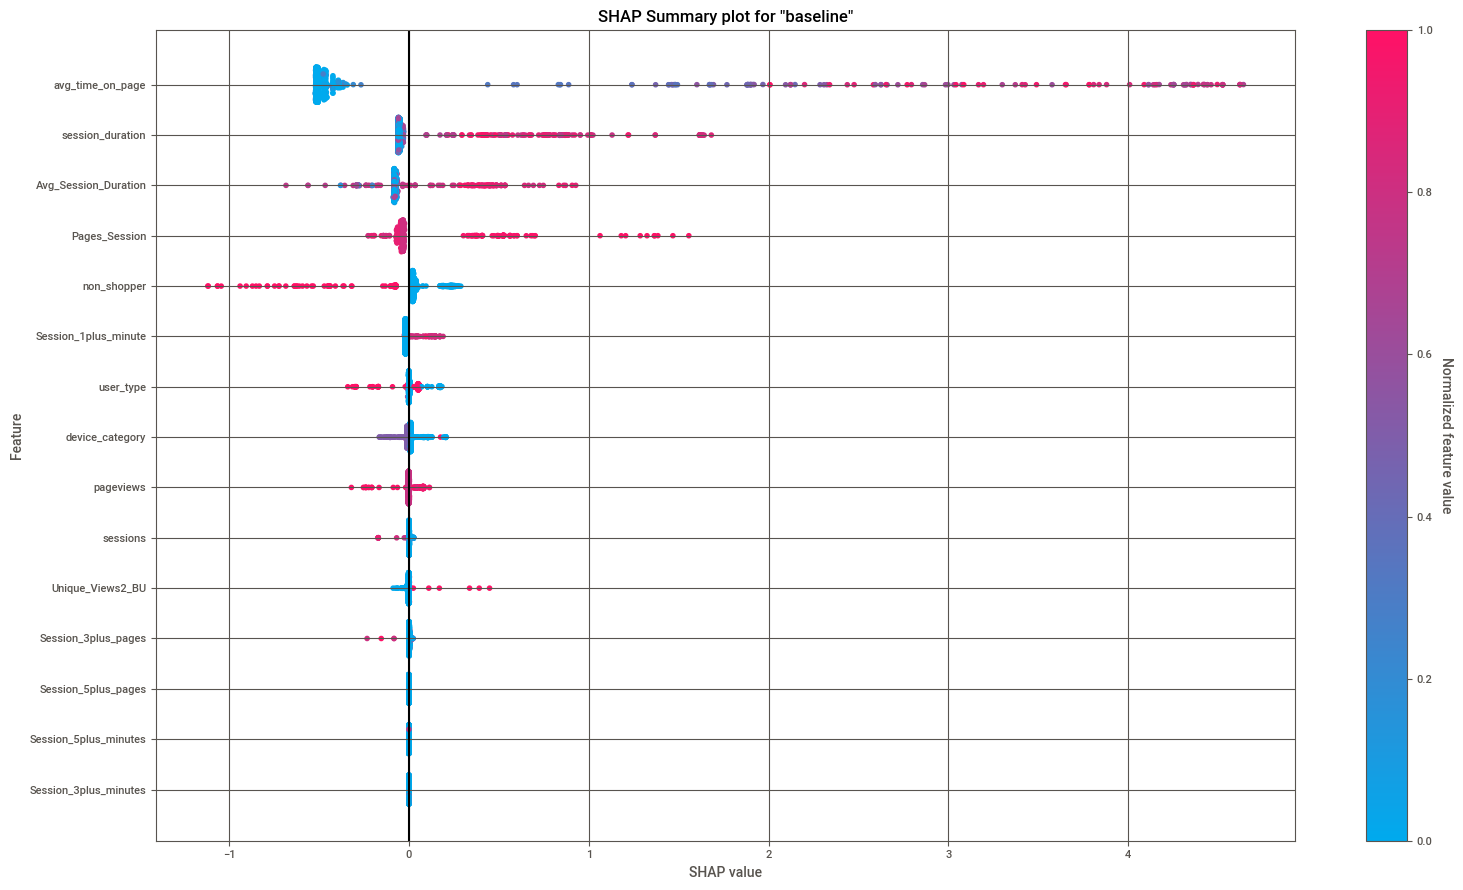

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

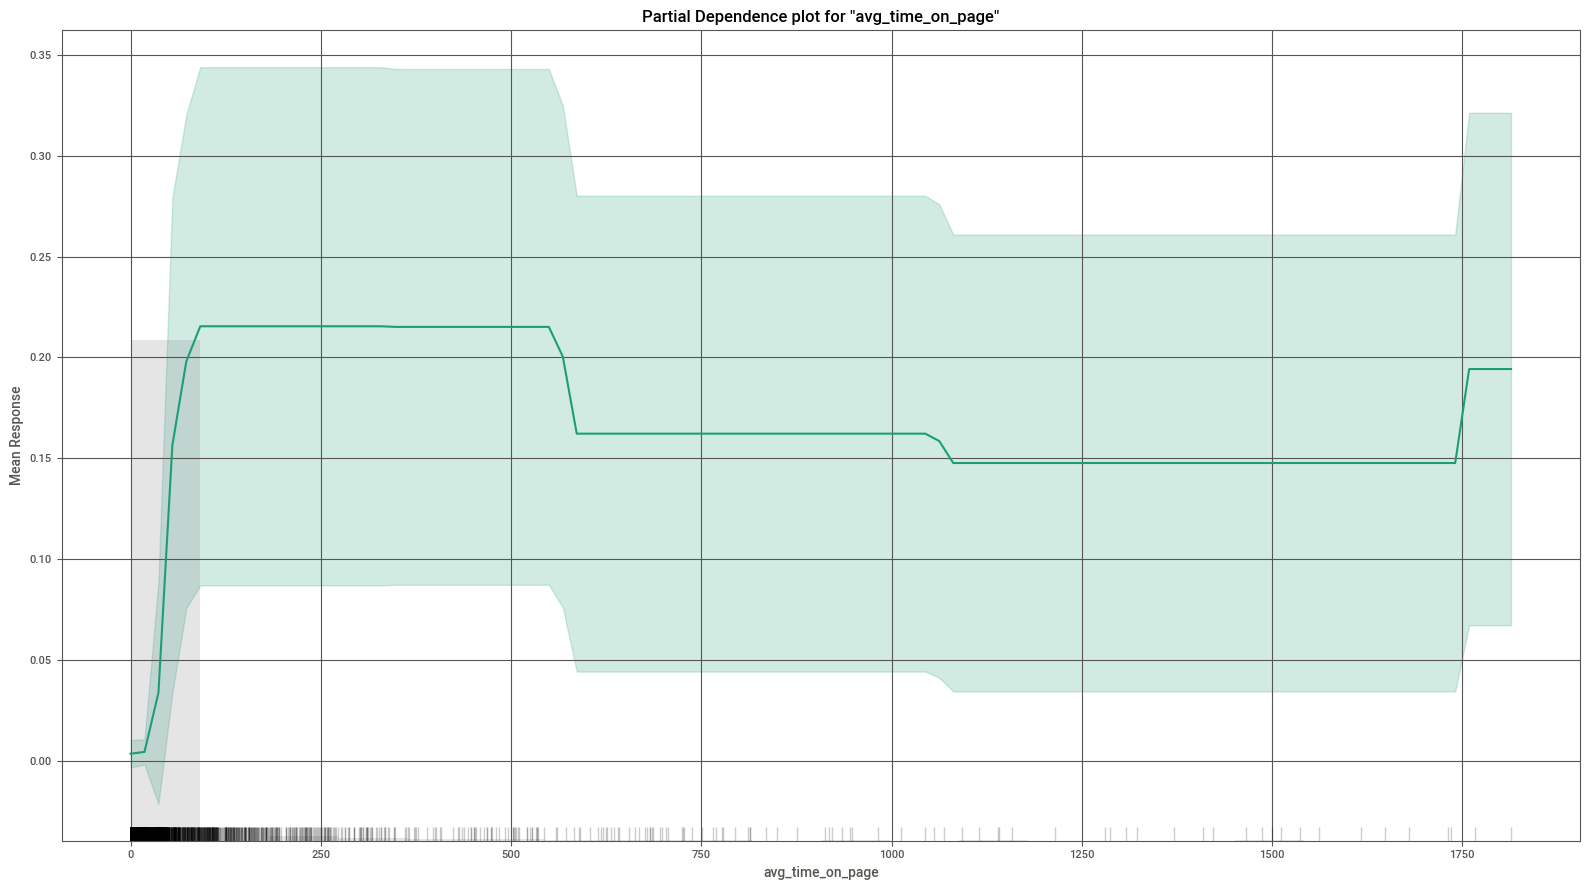

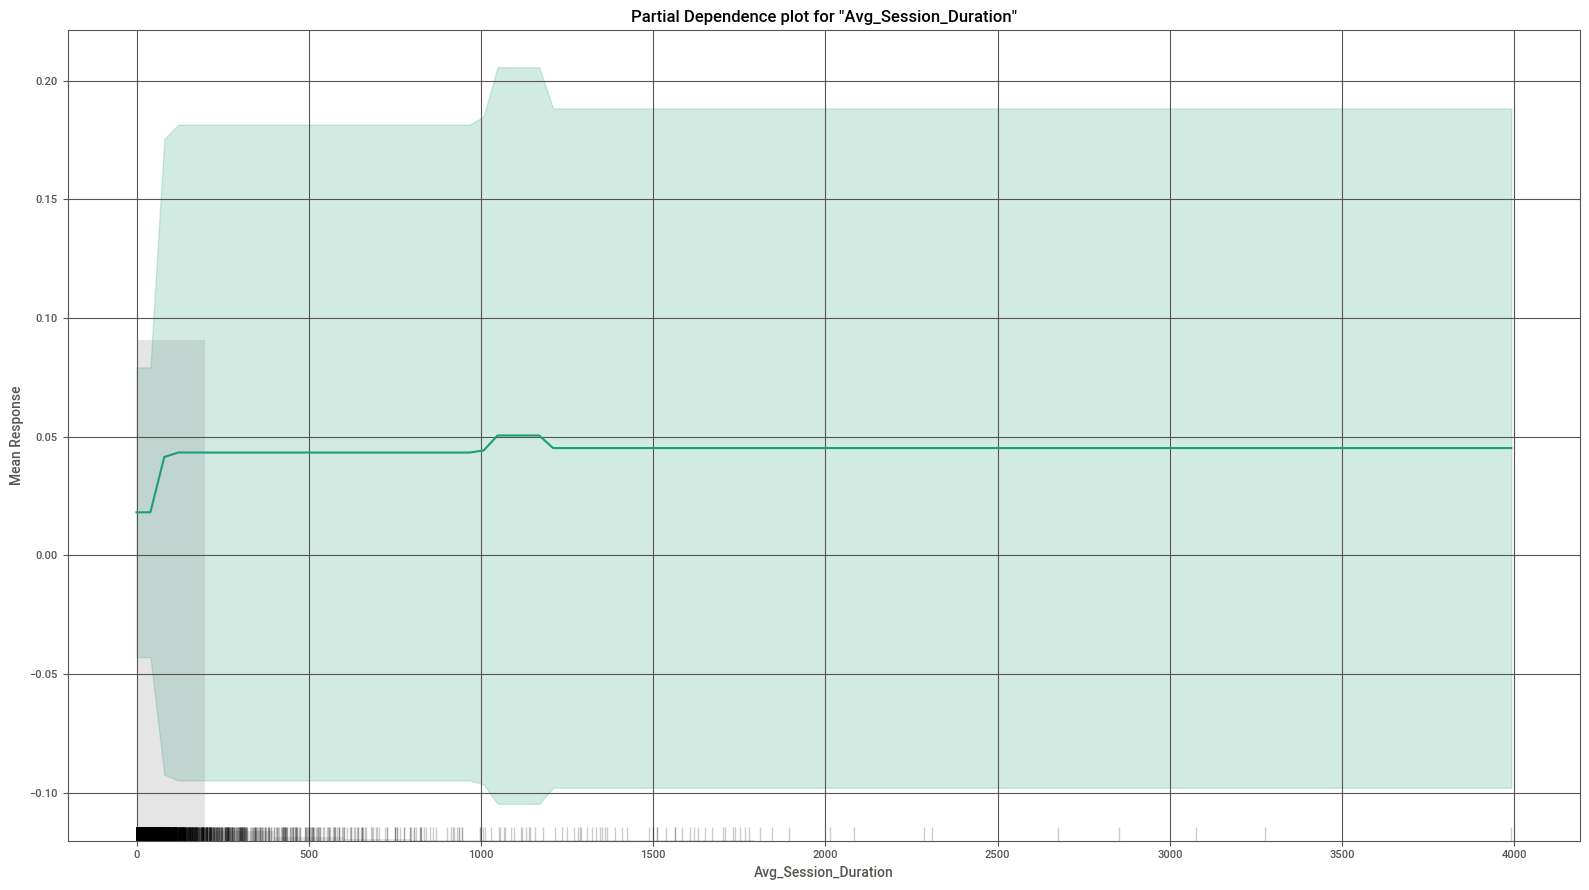

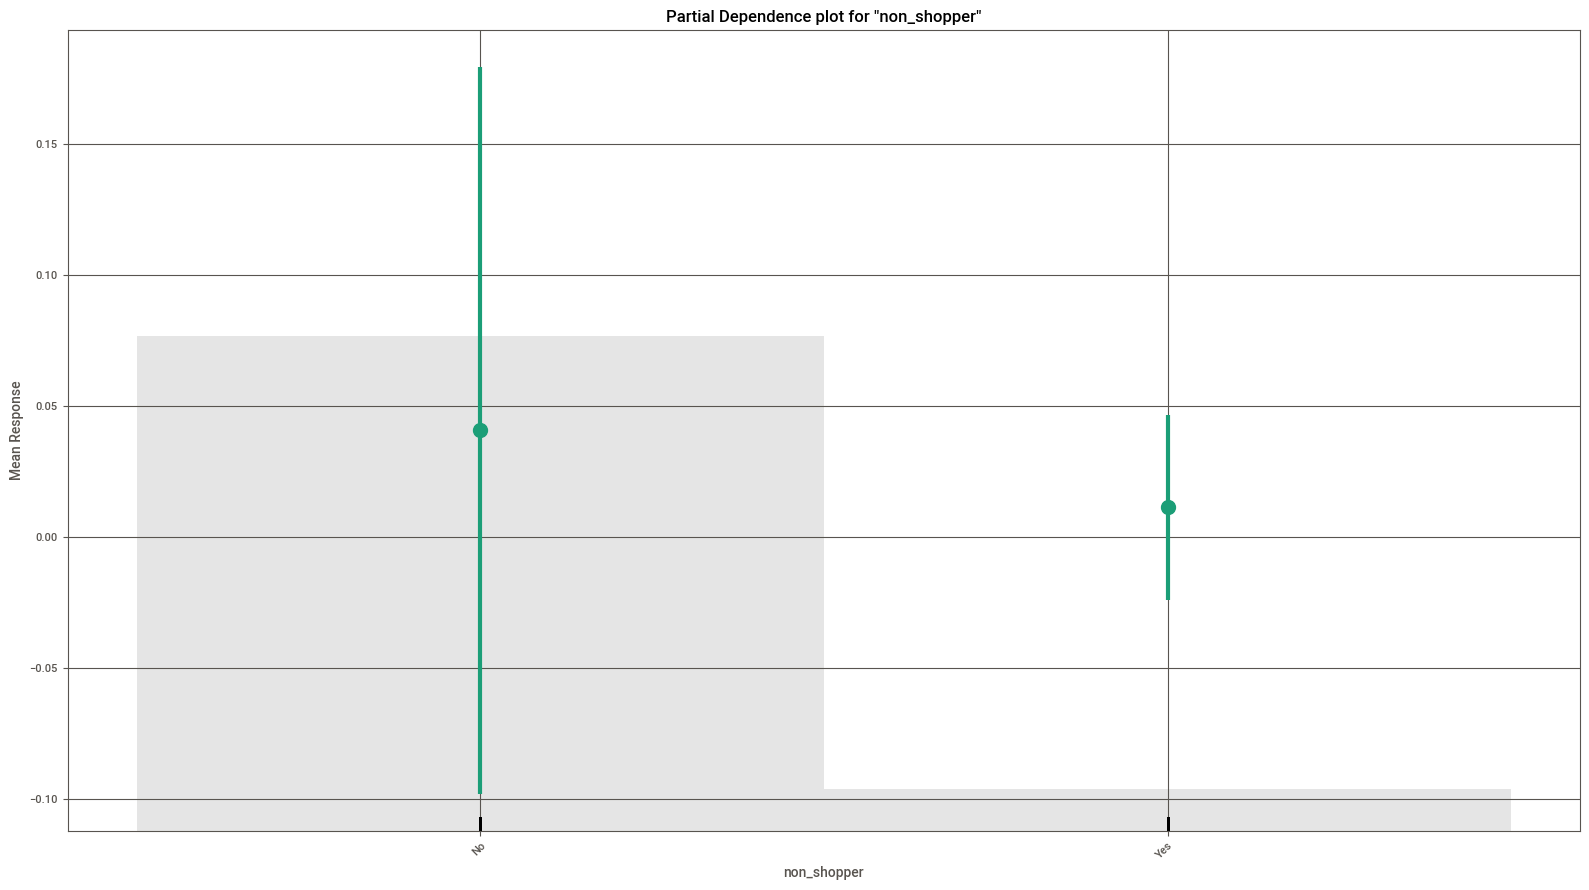

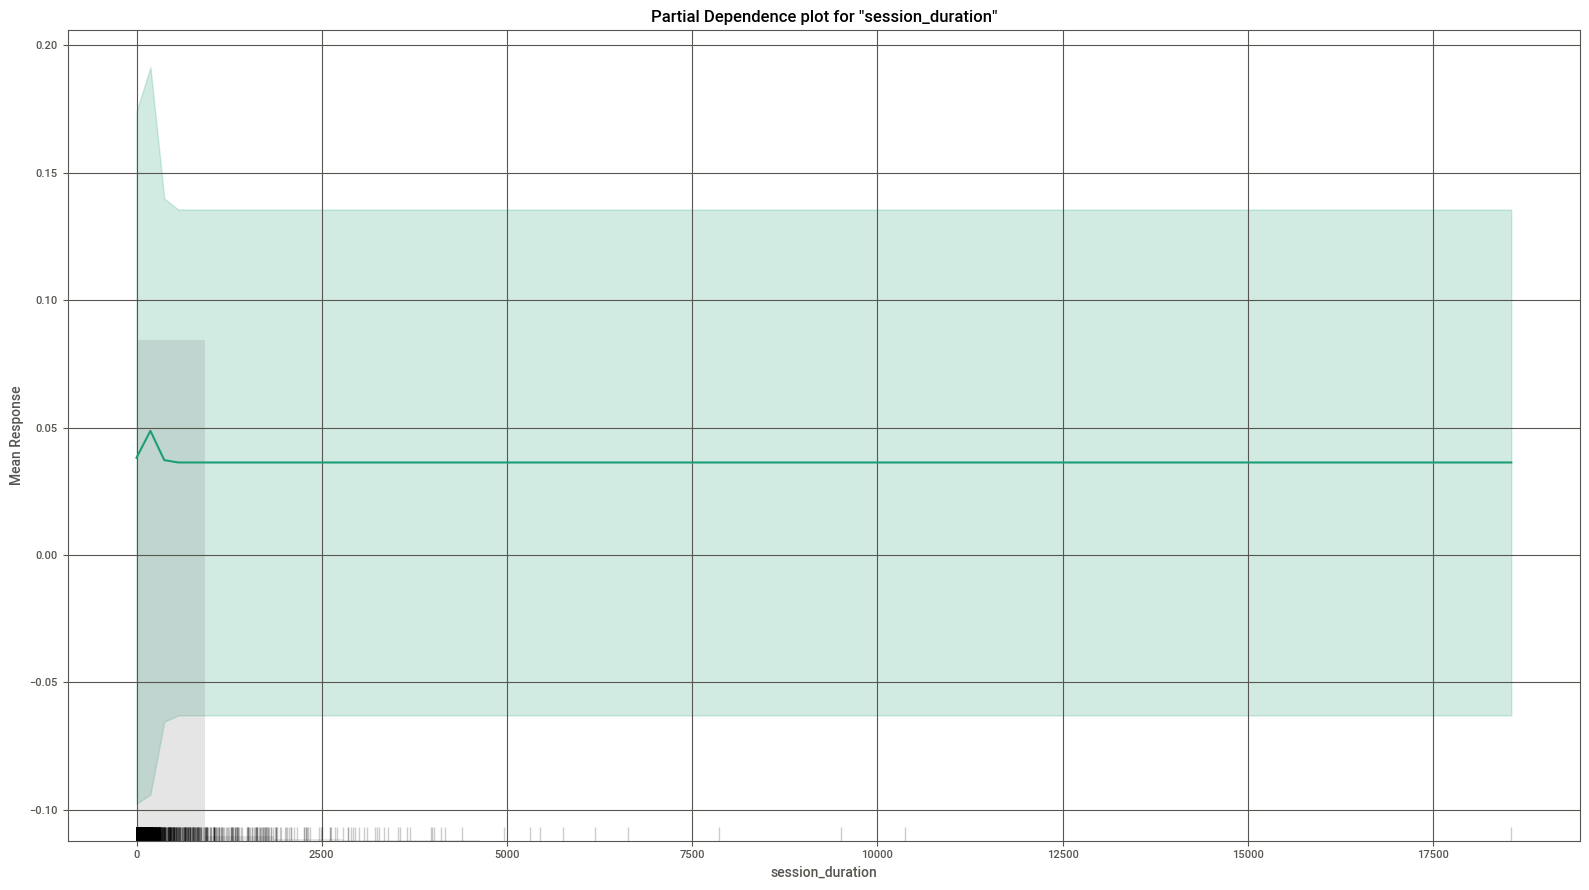

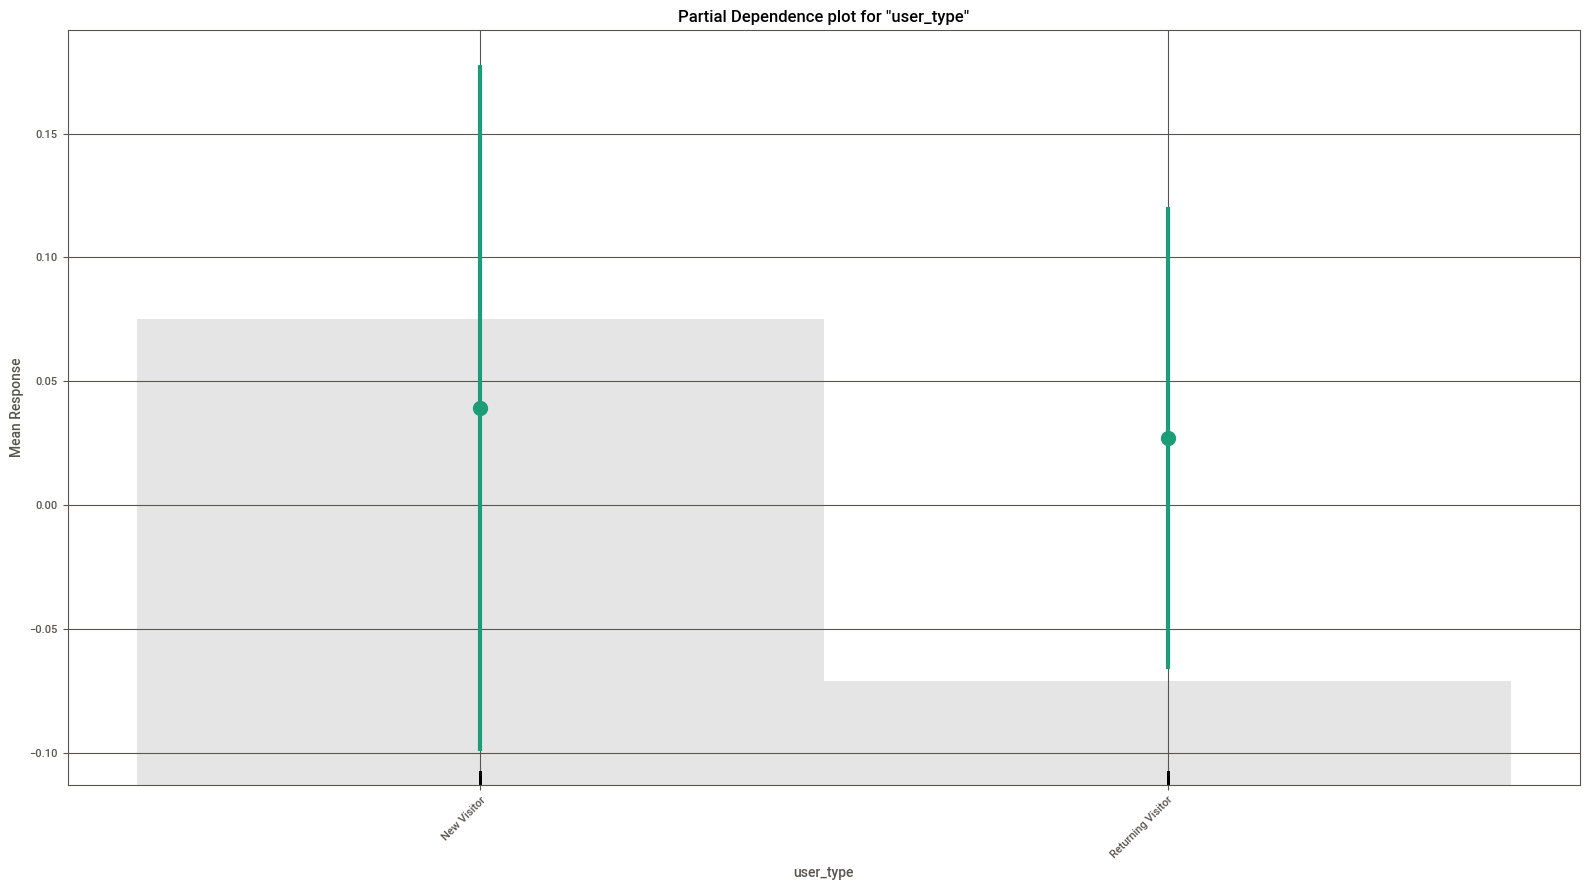

In [220]:
exm = gbm_model.explain(test_h2o,top_n_features = 5) #comprehensive model infomation

In [229]:
#save model and dataset for production and governance
#gbm_model.download_mojo( get_genmodel_jar=True) #saved moddel
#picklesave([cleandata,train_data,test_data,gbm_model], 'modeling_data_saved')

###     4.2 fine tune some of the parameters (monotonic binning)

In [140]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#x is predictor vector and Y is binary 0 or 1 vector
def mono_binxy(Y, X, n=20):
    r = 0
    while np.abs(r) < 1: # if not monotonic bin, try to reduce the number of bins
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n, duplicates='drop')})
        d2 = d1.groupby('Bucket', as_index=True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) #find the rank correlation coefficient
        n = n - 1 # get number of bins decreased by 1
    #output a dataframe with each bin lower bound and higher bound, number of positives,  total records in this bin, and event rate.
    d3 = pd.DataFrame({
        'min_' + 'X': d2.min().X,
        'max_' + 'X': d2.max().X,
        'Y': d2.sum().Y,
        'total': d2.count().Y,
        'Y' + '_rate': d2.mean().Y
    })

    d4 = d3.sort_values(by='min_' + 'X').reset_index(drop=True)
    return(d4)

In [227]:
dff4 = mono_binxy(cleandata.target.values,cleandata.avg_time_on_page.values,20)
dff4

,min_X,max_X,Y,total,Y_rate
0,0.000000,8.000000,35,42037,0.000833
1,8.080000,32.500000,62,2448,0.025327
2,32.619999,89.660004,658,2464,0.267045
3,89.800003,3080.000000,1050,2471,0.424929


In [228]:
#cut the variable into the optimal bins
pct = pd.cut(cleandata.avg_time_on_page,bins = list(dff4.min_X.values) + [dff4.max_X.max()],include_lowest
=True)
np.unique(pct.values,return_counts=True)

(array([Interval(-0.001, 8.079999923706055, closed='right'),
        Interval(8.079999923706055, 32.619998931884766, closed='right'),
        Interval(32.619998931884766, 89.80000305175781, closed='right'),
        Interval(89.80000305175781, 3080.0, closed='right')], dtype=object),
 array([42038,  2448,  2464,  2470]))